In [76]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from rdkit.Chem.Scaffolds import MurckoScaffold

In [51]:
#read data - ChemblID, canonical smiles, standard value and standard unit
data_file = open("./data/beta_amyloidA4_protein_IC50.tsv")
data_file.readline() #read the header (remove it)
def splitter(line):
    spls = line.strip().split("\t")
    if spls[14] != "" and spls[15] == "nM":
        return (Chem.MolFromSmiles(spls[10]),float(spls[14]))
mols = [splitter(line) for line in data_file]

mols = [m for m in mols if m]
len(mols)

785

#### I'm curious whether there are differences between active substances and substances with very low activty, so I split my dataset

In [54]:
active = [m for m in mols if m[1] < 1000]
active = [a for a in active]

inactive = [m for m in mols if m[1] >= 10000]
inactive = [i for i in inactive]

In [55]:
active[0]

(<rdkit.Chem.rdchem.Mol at 0x17f0b0e9120>, 2.8)

In [5]:
def make_graph_scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    atomic_scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    try:
        Chem.SanitizeMol(atomic_scaffold)
        graph_scaffold = MurckoScaffold.MakeScaffoldGeneric(atomic_scaffold)
    except ValueError:
        return None
    return graph_scaffold

##### Create graph scaffolds for all molecules in both datasets

In [12]:
active_graph_scaffolds = [make_graph_scaffold(mol[0]) for mol in active]

inactive_graph_scaffolds = [make_graph_scaffold(mol[0]) for mol in inactive]
len(inactive_graph_scaffolds), len([x for x in inactive_atomic_scaffolds if x])

(239, 239)

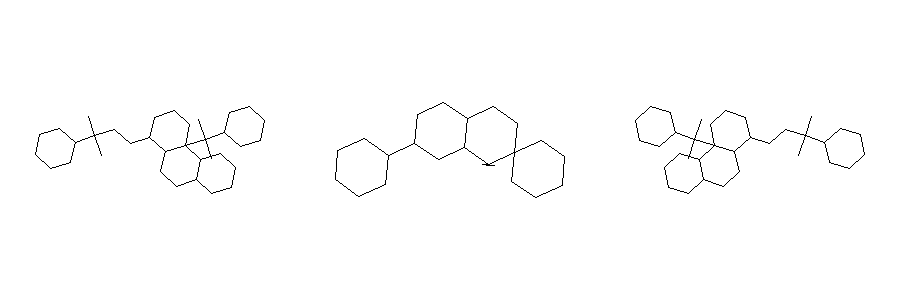

In [15]:
Draw.MolsToGridImage(active_graph_scaffolds[:3], subImgSize=(300, 300))

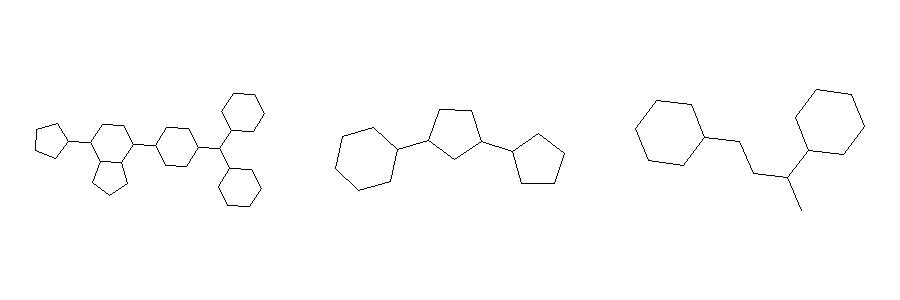

In [16]:
Draw.MolsToGridImage(inactive_graph_scaffolds[:3], subImgSize=(300, 300))

##### Find and draw the most frequent scaffolds.....

In [26]:
import collections
active_scaffold_smiles = [Chem.MolToSmiles(scaffold) for scaffold in active_graph_scaffolds]
inactive_scaffold_smiles = [Chem.MolToSmiles(scaffold) for scaffold in inactive_graph_scaffolds]

active_sc = collections.Counter(active_scaffold_smiles)
inactive_sc = collections.Counter(inactive_scaffold_smiles)

In [43]:
most_common_active_scf = [Chem.MolFromSmiles(tuple[0]) for tuple in active_sc.most_common()[:6]]
most_common_inactive_scf = [Chem.MolFromSmiles(tuple[0]) for tuple in inactive_sc.most_common()[:6]]

##### ...for active set

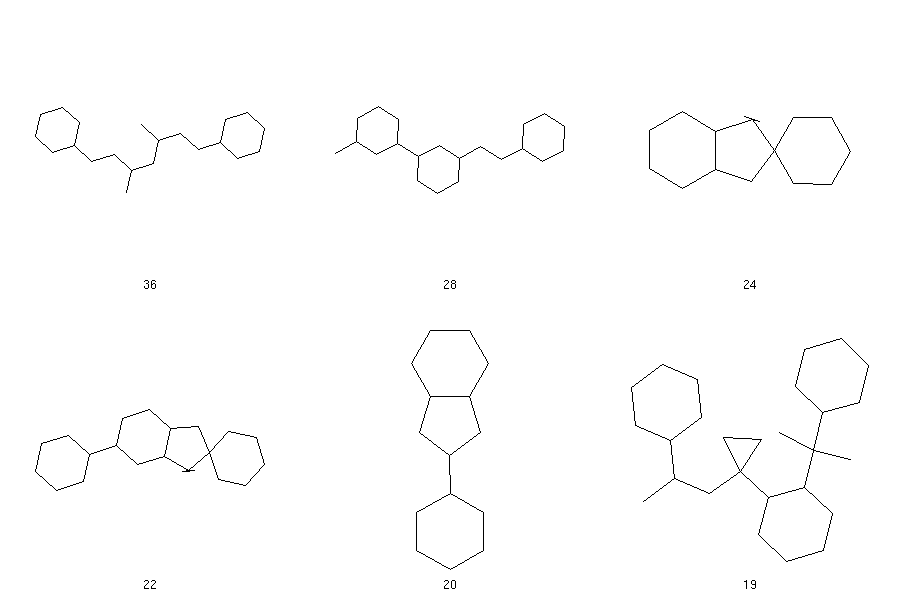

In [46]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in active_sc.most_common()[:6]],
                     legends=[str(count) for scaffold, count in active_sc.most_common()[:6]],
                     subImgSize=(300, 300))

##### ...and for inactive set

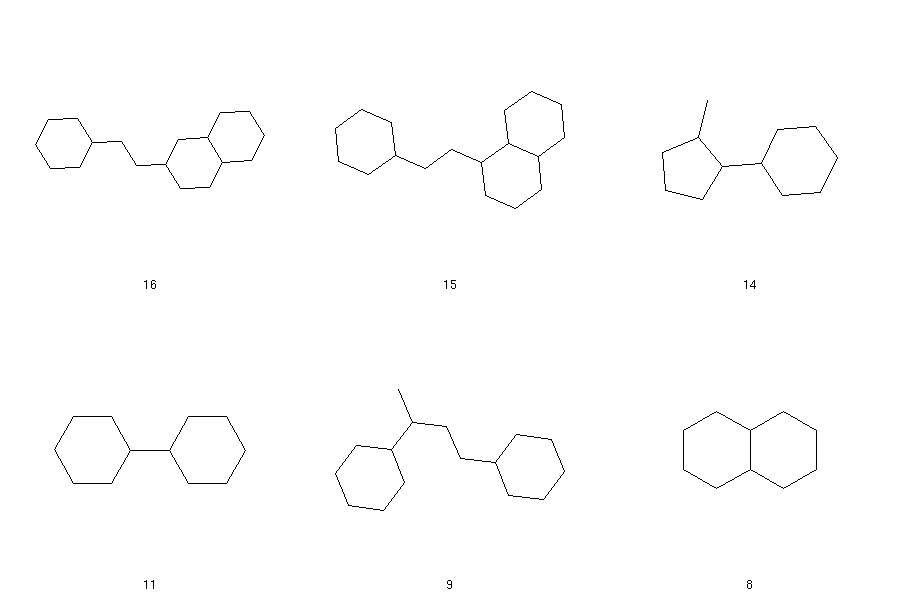

In [47]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in inactive_sc.most_common()[:6]],
                     legends=[str(count) for scaffold, count in inactive_sc.most_common()[:6]],
                     subImgSize=(300, 300))

## Histogram of logPs

In [48]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptor

In [67]:
logPs = [Descriptors.MolLogP(m[0]) for m in active]
logPs2 = [Descriptors.MolLogP(m[0]) for m in inactive]

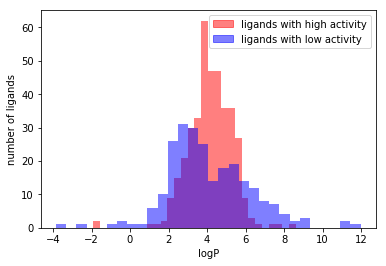

In [85]:
plt.hist(logPs, alpha=0.5, color="red", bins=30)
plt.hist(logPs2, alpha=0.5, color="blue", bins=30)
red_patch = mpatches.Patch(color='red', label='ligands with high activity', alpha=0.5)
blue_patch = mpatches.Patch(color='blue', label='ligands with low activity', alpha=0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('logP')
plt.ylabel('number of ligands')
plt.show()